Bernat Sort Rufat

MD005 Sistemas Basados en el Conocimiento

# Ejercicio 3.8: Aprendizaje inductivo - ID3 & J48

## Librerías 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

from scipy.io import arff
from six import StringIO
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score

## credit-g.arff dataset

Este dataset responde a un problema de clasificación, al tratar de decidir si una persona debería recibir el crédito que pide.

In [2]:
# cargamos el .arff file
creditg = arff.loadarff('credit-g.arff')
# creditg es una tupla que contiene dos elementos: un array numpy y una lista de tuplas
# primer elemento de la tupla (el array numpy) es el que nos interesa (creditg[0])

In [3]:
# convertimos los datos a df
creditg_df = pd.DataFrame(creditg[0])

In [ ]:
# 5 primeras filas del df
creditg_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [4]:
# nombres de las clases
creditg_df['class'].unique()

array([b'good', b'bad'], dtype=object)

In [5]:
# renombramos las clases para un mejor entendimiento 
creditg_df['class'].replace({b'good': 'good', b'bad': 'bad'}, inplace = True)
creditg_df['class'].unique()

array(['good', 'bad'], dtype=object)

In [54]:
# columnas del df
creditg_df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [55]:
# 5 primeras filas del df correcto
creditg_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',good
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',bad
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',good
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',good
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',bad


In [56]:
# info de las columnas del df
creditg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

- Observamos que el df creditg_df tiene 1000 filas y 21 columnas. 
- Todas las columnas tienen 1000 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.
- Los tipos de datos de las columnas son float64 para 7 de las columnas y object para el resto. No obstante, installment_commitment, residence_since, existing_credits y num_dependents, aunque las indique como float64, son categóricas. 


Convertimos installment_commitment, residence_since, existing_credits y num_dependents a object, ya que en realidad son categóricas.

In [6]:
# Convertimos las variables categóricas a object
creditg_df[['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']] = creditg_df[['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']].astype(object)

In [58]:
# estadísticas descriptivas 
creditg_df.describe()

,duration,credit_amount,age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000
std,12.058814,2822.736876,11.375469
min,4.000000,250.000000,19.000000
25%,12.000000,1365.500000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3972.250000,42.000000
max,72.000000,18424.000000,75.000000


El método df.describe() genera estadísticas descriptivas de un df.

Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna del df.


- El atributo "duration" tiene una media de 20.903 y una desviación típica de 12.058814. Esto significa que la duración media del crédito es de unos 20 meses, y que la mayoría de las duraciones se sitúan entre 12 y 24 meses.

- El atributo "credit_amount" tiene una media de 3271.258 y una desviación típica de 2822.736876. El importe medio del crédito se sitúa en torno a 3271, y la mayoría de los importes se sitúan entre 1365 y 3972.

- El atributo "age" tiene una media de 35.546 y una desviación típica de 11.375469. Esto significa que la edad media es de unos 35.5 años y que la mayoría de los casos se sitúan entre los 27 y los 42 años.

En conclusión, estas estadísticas proporcionan una buena visión general de la distribución de los atributos y sus valores en el dataset. Los valores de la media, la desviación típica y el percentil de los atributos se sitúan dentro de unos márgenes razonables.

### Distribución de cada variable

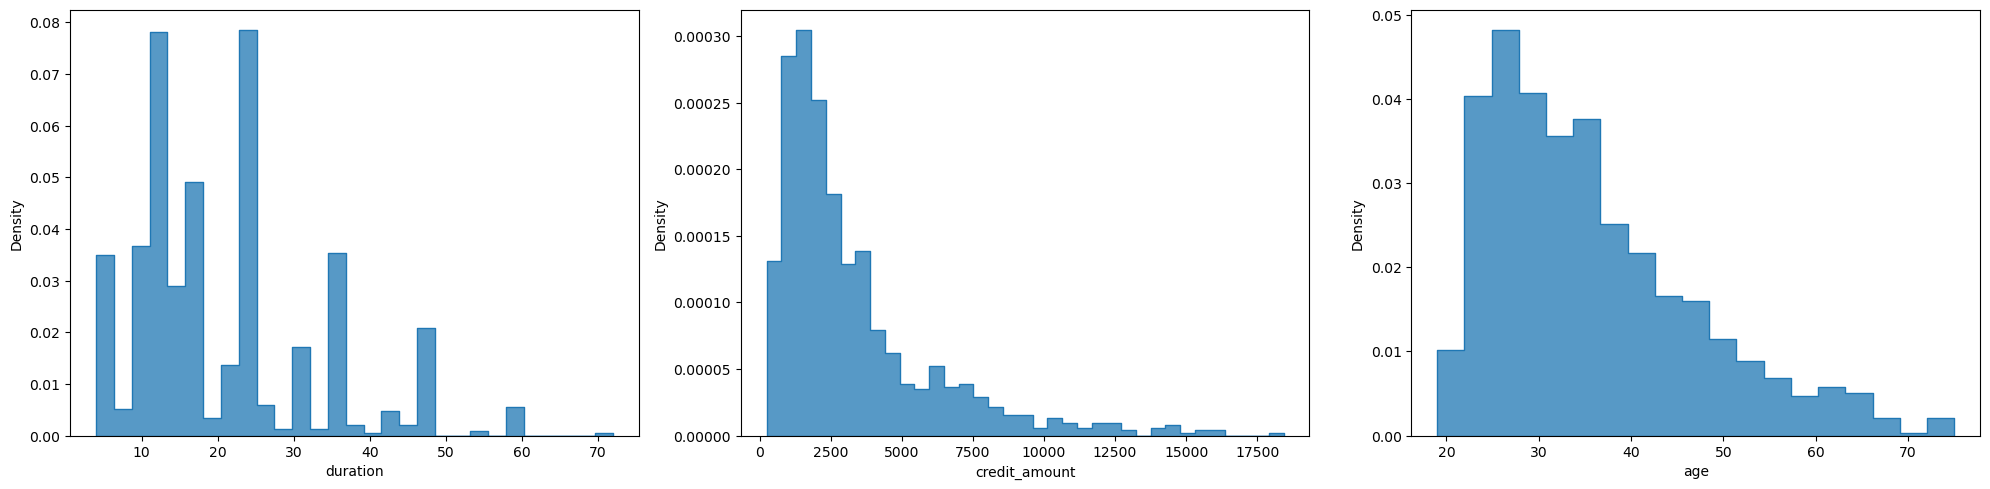

In [7]:
# creating a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# numeric columns
num_cols = creditg_df.select_dtypes(include=[np.number])
num_col_names = num_cols.columns

# loop through the subplots and column names to plot the histograms
for i, ax in enumerate(axs.flat):
    sns.histplot(data=creditg_df, x=num_col_names[i], element='step', stat='density', ax=ax)
    ax.set(xlabel=num_col_names[i], ylabel='Density')

# adjusting the spacing between the subplots
plt.tight_layout()

# showing the plot
plt.show()

- Observamos que las variables numéricas (duration, credit_amount y age) presentan una asimetría positiva.


### Conversión var categóricas a numéricas (LabelEncoding)

Debido a que DecisionTree de sklearn solo acepta variables numéricas, debemos pasar las variables categóricas de nuestro dataset a variables numéricas.

Para ello usaremos Label Encoding:
-  Convierte una columna categórica a una numérica, dándole un valor único a cada posible valor de texto. 
- Por ejemplo, si usamos como ejemplo la columna “housing” del dataset credit-g.arff, esta columna tiene como posibles valores “rent”, “own” y “for free”. Con el label encoding pasaríamos a tener una nueva columna “housing_num” donde los posibles valores serían 0 (=rent), 1 (=own) y 2 (=for free).
- Si nos encontramos con una variable categórica ordinal se debería usar el label encoding, ya que esta representa con los valores (0, 1, 2) un orden (una jerarquía)
- Para un árbol de decisión, aunque no sean variables categóricas ordinales (jerarquía) está bien codificar categorías utilizando valores ordinales (0, 1, 2, 3, etc.). En cambio, para un algoritmo que aprende un peso para cada variable no estaría bien.
- En este caso, el árbol de decisión es más legible si usamos Label Encoding. 

In [8]:
# creamos una instancia de LabelEncoder
le = LabelEncoder()

# seleccionamos todas las columnas categóricas
cat_cols = creditg_df.select_dtypes(include='object').columns

# aplicamos LabelEncoder a cada columna:
    # La función lambda toma una columna (col) como entrada y le aplica el método fit_transform() de la clase LabelEncoder. 
    # Aplicamos el método fit_transform() de la clase LabelEncoder a cada una de 
    # las columnas categóricas del df, sustituyendo los valores categóricos originales por valores numéricos.
creditg_df[cat_cols] = creditg_df[cat_cols].apply(lambda col: le.fit_transform(col))

In [61]:
# df con todos los datos numéricos
creditg_df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,3,3,2,...,3,67.0,1,1,1,1,0,1,1,1
1,0,48.0,3,6,5951.0,2,0,1,0,2,...,3,22.0,1,1,0,1,0,0,1,0
2,3,12.0,1,2,2096.0,2,1,1,3,2,...,3,49.0,1,1,0,3,1,0,1,1


In [62]:
# comprobamos que sean numéricas
creditg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   int64  
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   int64  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int64  
 14  housing                 1000 non-null   i

- Ahora podemos utilizar este df con variables numéricas para ajustar y entrenar el modelo de árbol de decisión.

### Separar las variables independientes de la variable dependiente
- Separar en atributos (X) y etiquetas (y).
- Las columnas del conjunto de datos se pueden separar en feature columns (X) y target column (y).

In [9]:
# variables independientes (feature columns): las variables que se utilizan para predecir la variable objetivo (y)
X = creditg_df.iloc[:, :-1].values
# variable dependiente (target column): en nuestro caso 'class'
y = creditg_df.iloc[:, -1].values

### Comprobación del desequilibrio de clases

In [10]:
# Checking data imbalance 
print(creditg_df['class'].value_counts()) # recuento de instancias de cada clase en el df

1    700
0    300
Name: class, dtype: int64


- 0: bad
- 1: good

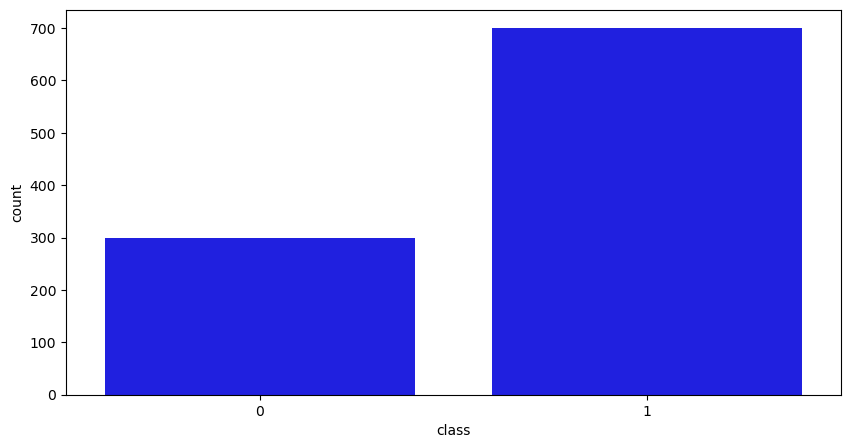

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x = creditg_df['class'], color = 'blue')
plt.show()

- Podemos observar que hay un desequilibrio de clases.
- Vemos que la clase bad solo tiene 300 instancias, mientras que la clase good tiene 700 instancias. 
- Este desequilibrio en el número de instancias de cada clase puede plantear problemas a la hora de entrenar y evaluar modelos de Machine Learning. Por ejemplo, un modelo que siempre predice la clase mayoritaria es probable que logre una alta accuracy, pero no será útil en la práctica, ya que no está generalizando bien.

### Oversampling con SMOTE 

- Al tratarse de datos desequilibrados, nuestro modelo podría intentar ajustarse a la clase mayoritaria y proporcionar una predicción sesgada, además de ofrecer una accuracy engañosa.
- Por este motivo, realizaremos un procedimiento de sobremuestreo en las clases minoritarias con SMOTE.

In [11]:
SMOTE = SMOTE()
X_o, y_o = SMOTE.fit_resample(X,y)

In [12]:
# miramos el resultado de sobremuestro
y1 = pd.DataFrame(y_o)
y1.value_counts()

0    700
1    700
dtype: int64

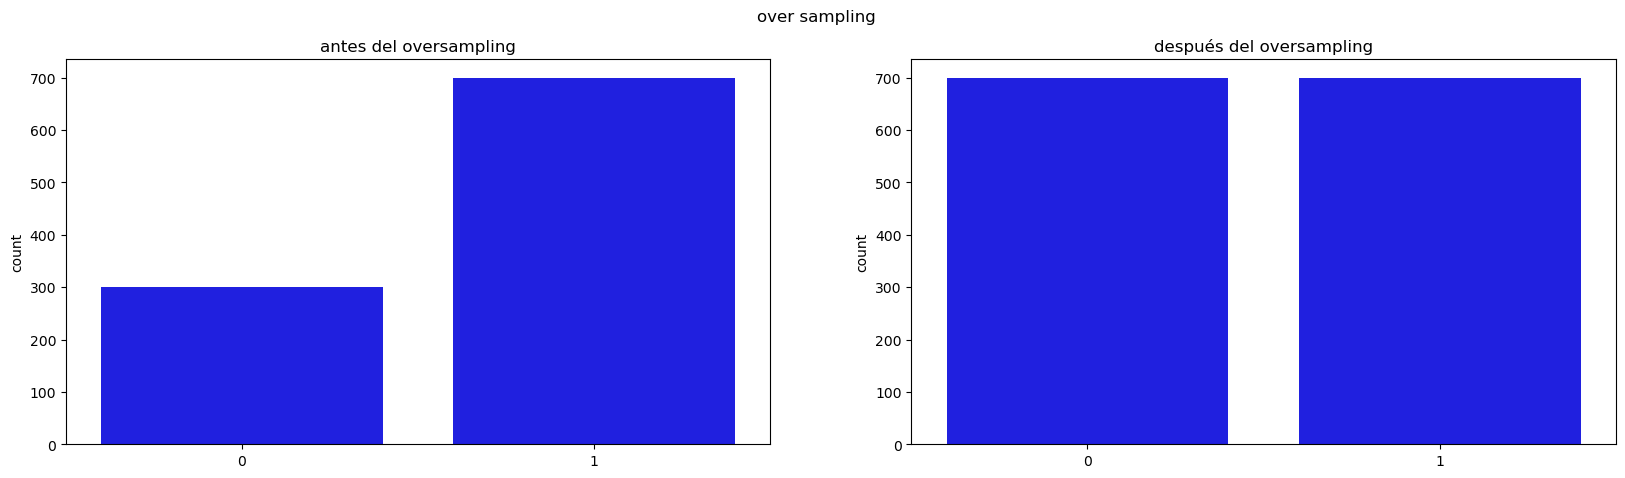

In [22]:
figure, axes = plt.subplots(1, 2, sharex=True,figsize=(20, 5))
figure.suptitle('over sampling')
axes[0].set_title('antes del oversampling')
axes[1].set_title('después del oversampling')
sns.countplot(x = y, color = 'blue',ax=axes[0])
sns.countplot(x = y_o, color = 'blue',ax=axes[1])
plt.show()

- Hemos incrementado de forma “sintética” los ejemplos de la clase minoritaria.
- Podemos observar que ya no hay un desequilibrio de clases, las clases están balanceadas.

### Escalar los atributos

- Escalamos los datos después de aplicar SMOTE ya que después de sobremuestrear los datos, la varianza de los datos aumentará artificialmente, por lo que el escalado puede ayudar a solucionar este problema. 

- Por lo general, es una buena práctica estandarizar o normalizar las variables numéricas antes de dividir los datos en training y test set, ya que puede ayudar a evitar sesgos en el proceso de modelado y mejorar el rendimiento del modelo. 

- Estandarizar o normalizar los datos implica transformar los valores de las variables para que tengan una media de 0 y una desviación estándar de 1.

- Como ya hemos convertido las variables categóricas a numéricas utilizando label encoder (que asigna un valor entero único a cada categoría), no es necesario estandarizarlas. En su lugar, estandarizamos/normalizamos los atributos numéricos que ya están en el dataset: duration, credit_amount y age.



Como X_o es un array, en lugar de especificar los nombres de las columnas, debemos especificar los índices de las columnas numéricas del array.

In [13]:
# Índices de las columnas numéricas del df
# recordemos que: num_cols = creditg_df.select_dtypes(include=[np.number])
                # num_col_names = num_cols.columns
# método get_loc() para obtener los índices
num_cols_index = [creditg_df.columns.get_loc(col) for col in num_col_names]
num_cols_index

[1, 4, 12]

In [14]:
# creamos una instancia de StardardScaler
scaler = StandardScaler()
# copia de X y la asignamos a X_scaled
X_scaled = X_o

# normalizamos las variables numéricas
scaler.fit(X_scaled[:, num_cols_index])
X_scaled[:, num_cols_index] = scaler.transform(X_scaled[:, num_cols_index])

In [15]:
X_scaled

array([[ 1.        , -1.34227947,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  2.18744677,  3.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , -0.83803286,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 2.76849674,  1.06221883,  3.        , ...,  0.11575163,
         0.88424837,  1.        ],
       [ 3.        ,  0.08108948,  3.        , ...,  0.        ,
         0.94092119,  1.        ],
       [ 0.        , -0.46417706,  1.31030245, ...,  0.        ,
         0.        ,  1.        ]])

- El resultado es un nuevo conjunto de valores que tienen una distribución normal estándar (una distribución gaussiana con una media de 0 y una desviación estándar de 1).
- Ahora los tenemos todos dentro de un mismo rango o intervalo.
- La variable X_scaled contiene la versión estandarizada de la feature data almacenada en X_o (solo las variables numéricas).
- Recordamos que esto solo se ha aplicado a las variables que eran numéricas antes de hacer el label encoding. 

### Dividir en train y test set

El método de Train-Test-Split se utiliza para dividir el conjunto de datos en dos partes: el conjunto de entrenamiento (training set) y el conjunto de prueba (test set). 

El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de pruebas se utiliza para evaluar el rendimiento del modelo. Esto es importante por varias razones:

- Overfitting: sin un método de evaluación adecuado, es fácil caer en la trampa del overfitting, en la que el modelo memoriza los datos de entrenamiento, pero obtiene malos resultados con datos nuevos que nunca ha visto. Si se evalúa el rendimiento del modelo en un test set separado, se puede detectar y evitar el overfitting.

- Selección de modelos (model selection): Train-Test-Split permite comparar diferentes modelos y seleccionar el que obtiene mejores resultados en el test set, lo que permite hacerse una mejor idea del rendimiento del modelo con datos nuevos y desconocidos.

- Evaluación no sesgada (unbiased evaluation): al utilizar un test set separado para la evaluación, podemos asegurarnos de que la evaluación no es sesgada (unbiased) y no se ve afectada por el proceso de entrenamiento.

- Generalización: al evaluar el rendimiento del modelo con datos desconocidos, podemos hacernos una idea de cómo funcionará el modelo con datos nuevos y desconocidos, lo que es esencial para determinar su capacidad de generalización.

En resumen, utilizar el método de Train-Test-Split antes de aplicar una técnica de aprendizaje es una buena práctica que ayuda a garantizar que el modelo sea robusto, generalizable y no sesgado, así como a evaluar su rendimiento de forma no sesgada.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_o, test_size=0.2, random_state=42)

- El test set será el 20% del conjunto total de datos (test_size=0.2). Podemos usar 80%-20% ya que tenemos relativamente pocas instancias (1000). Con muchas intancias se recomienda 70%-30%. 
- El random_state se establece en 42, lo que significa que se producirá la misma división cada vez que se ejecute el código.

### Hyperparameter tuning

Un modelo, como un árbol de decisión, puede entrenarse con o sin hiperparámetros. Sin embargo, generalmente se recomienda utilizar hiperparámetros cuando se entrena un modelo, ya que pueden afectar en gran medida al rendimiento de este.

Los hiperparámetros son parámetros que establece el usuario antes de entrenar el modelo. Estos parámetros pueden incluir cosas como la profundidad del árbol, el número mínimo de muestras necesarias para dividir un nodo o el número máximo de hojas del árbol.

Entrenar un modelo sin hiperparámetros, también conocidos como parámetros por defecto, puede provocar a un rendimiento subóptimo, ya que el modelo puede no ser capaz de capturar la complejidad de los datos o puede ajustarse en exceso a los datos de entrenamiento. Por otro lado, establecer los hiperparámetros adecuados puede ayudar a mejorar el rendimiento del modelo y aumentar su capacidad de generalización.

No obstante, encontrar el conjunto adecuado de hiperparámetros puede ser una tarea que lleve mucho tiempo y que requiera de ensayo y error. 
Un método habitual para encontrar el conjunto óptimo de hiperparámetros es mediante el Grid Search, que permite probar diferentes combinaciones de hiperparámetros y seleccionar el conjunto con mejor rendimiento en un conjunto de validación.

Algunos hiperparámetros que se utilizan comúnmente para DecisionTreeClassifier son:

- **max_depth**: la profundidad máxima del árbol. Aumentar la profundidad máxima hará que el modelo sea más complejo, pero también aumenta el riesgo de overfitting.

- **min_samples_split**: el número mínimo de muestras necesarias para dividir un nodo interno. Aumentar este valor hará que el modelo sea menos complejo y reducirá el riesgo de overfitting.

- **min_samples_leaf**: el número mínimo de muestras necesarias para estar en un nodo hoja. Este parámetro también puede utilizarse para controlar el overfitting.

- **max_features**: el número de características a considerar cuando se busca la mejor división. Este parámetro puede utilizarse para reducir la dimensionalidad de los datos y aumentar el rendimiento del modelo.

- **criterion**: la función para medir la calidad de una división. El valor por defecto es "gini", pero también se puede usar "entropy".

- **class_weight**: los pesos asociados a las clases. Este parámetro puede utilizarse para equilibrar las clases.


Es importante tener en cuenta que, aunque GridSearchCV nos puede ayudar a encontrar la mejor combinación de hiperparámetros, siempre es una buena práctica evaluar los resultados en el conjunto de prueba (no sólo en el conjunto de entrenamiento), para evaluar la capacidad de generalización del modelo.


Para este caso, hemos utilizado los siguientes hiperparámetros:

- **min_samples_split**: controla el número mínimo de muestras necesarias para dividir un nodo interno en el árbol de decisión. Se utiliza para evitar el overfitting asegurando que el árbol no continúe dividiéndose hasta que cada nodo hoja contenga sólo una muestra.

- **min_samples_leaf**: controla el número mínimo de muestras necesarias para estar en un nodo hoja. Se utiliza para evitar el overfitting asegurando que el árbol no continúe dividiéndose hasta que cada nodo hoja contenga sólo un pequeño número de muestras.

- **max_leaf_nodes**: controla el número máximo de nodos hoja que puede generar el árbol de decisión. Se utiliza para evitar el overfitting asegurando que el árbol no sigue creciendo hasta que se vuelve demasiado complejo y capture ruido en los datos. El GridSearchCV probará diferentes valores en el array para encontrar el tamaño óptimo del árbol.

In [17]:
model_params = {
    # mín instancias que se necesita para hacer una división
    'min_samples_split': [2, 4, 6],
    # número mínimo de muestras necesarias para estar en un nodo hoja
    'min_samples_leaf': [1, 2, 3],
    # nº max de hojas que tendrá el árbol
    'max_leaf_nodes':[10, 20, 30, 50]
}

El mínimo de instancias que se necesita para hacer una división es 2:
- Si hay una instancia que queda colgada, se va a unir a una hoja, no se va a hacer una división de nuevo de los atributos con nuevos valores.
- Vamos a ir probando todas las permutaciones del 1r valor de max_leaf_nodes con todos los valores de min_samples_split, el 2º valor con todos los valores de min_samples_split, etc.
- Vamos a ver que combinación de valores son los más adecuados para nuestro dataset. 

In [144]:
# info sobre los parámetros del DecisionTreeClassifier
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

### Grid Search 

- Utilizamos GridSearchCV para encontrar la mejor combinación de hiperparámetros para el DecisionTreeClassifier.

In [35]:
# instanciamos la clase DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42) # random_state=42 para que en cada ejecución nos salga el mismo resultado

# GridSearchCV nos permite encontrar la mejor combinación de hiperparámetros
gscv = GridSearchCV(model, model_params, cv=10) # cv es el cross-validation con 10 folds para entrenar el algoritmo y validarlo

# fit del GridSearchCV
model_gs = gscv.fit(X_train, y_train)

# obtenemos los mejores parámetros y la accuracy con esos parámetros
print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_)) 

Best: 0.766071 using {'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


- Los mejores parámetros encontrados son max_leaf_nodes=10, min_samples_leaf=1, y min_samples_split=2, con los que se consigue una accuracy del 76.6% en el conjunto de entrenamiento. 

### Generar el árbol de decisión óptimo

A continuación, el modelo se vuelve a entrenar con estos parámetros y se evalúa en el test set.

In [19]:
# cogemos los parámetros anteriores (los mejores)
model = DecisionTreeClassifier(max_leaf_nodes= 10, min_samples_leaf= 1, min_samples_split= 2, criterion='entropy') # escogemos como criterio la entropía
model.fit(X_train, y_train)
# predicción de los valores 
y_pred = model.predict(X_test)

[Text(0.5, 1.0, 'Decision Tree with Hyperparameters')]

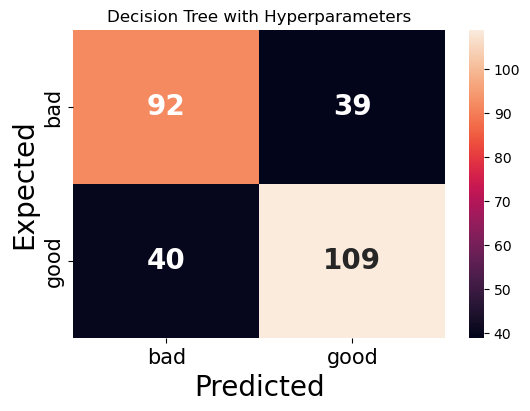

In [21]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['good', 'bad']
ax.set_xticklabels(labels[::-1], fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Expected', fontsize=20);
ax.set_xlabel('Predicted', fontsize=20)
ax.set(title='Decision Tree with Hyperparameters')

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(92, 39, 40, 109)

De la matriz de confusión se observa que:

- 92 muestras que eran realmente "bad" fueron clasificadas correctamente como "bad" por el modelo (TN)
- 109 muestras que en realidad eran "good" fueron clasificadas correctamente como "good" por el modelo (TP).
- 40 muestras que en realidad eran "good" fueron clasificadas como "bad" por el modelo. Se trata de falsos negativos (error de tipo II).
- 39 muestras que en realidad eran "bad" fueron clasificadas como "good" por el modelo. Se trata de falsos positivos (error de tipo I).

In [39]:
# Precision, recall, f-score from the multi-class support function
print('#'*60)
print('Decision Tree with Hyperparameters')
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred), 3))

############################################################
Decision Tree with Hyperparameters
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       131
           1       0.81      0.70      0.76       149

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.76      0.76      0.76       280

Accuracy score:  0.757
F1 Score:  0.755


- El modelo entrenado con los mejores hiperparámetros y evaluado en el test set da como resultado una accuracy de 0.757, lo que significa que el modelo ha clasificado correctamente el 75.7% de las muestras del test set. 
- Esto indica que el modelo funciona moderadamente bien en el test set (datos no vistos). 

### Visualización

La función export_graphviz de la biblioteca scikit-learn, que se utiliza para visualizar árboles de decisión, tiene varios hiperparámetros que se pueden especificar. Algunos de ellos son:

- **decision_tree**: el objeto árbol de decisión a exportar.

- **out_file**: el nombre de archivo u objeto de archivo al que se exportará el árbol. Si no se especifica, el árbol se mostrará en la consola.

- **max_depth**: la profundidad máxima del árbol que se exportará. Si no se especifica, se exportará todo el árbol.

- **feature_names**: una lista de nombres de características que se utilizarán en el árbol exportado. Si no se especifica, se utilizarán los índices de las características.

- **class_names**: lista de nombres de clases que se utilizarán en el árbol exportado. Si no se especifica, se utilizarán los índices de clase.

- **rounded**: Si se redondean los valores del árbol exportado a enteros. Si no se especifica, los valores se exportarán tal cual.

- **filled**: si se rellenan con colores las casillas del árbol exportado. Si no se especifica, las casillas se dejarán vacías.

- **special_characters**: si se van a utilizar caracteres especiales (como letras griegas) para representar ciertas características en el árbol exportado. Si no se especifica, se utilizarán los nombres o índices de las características.


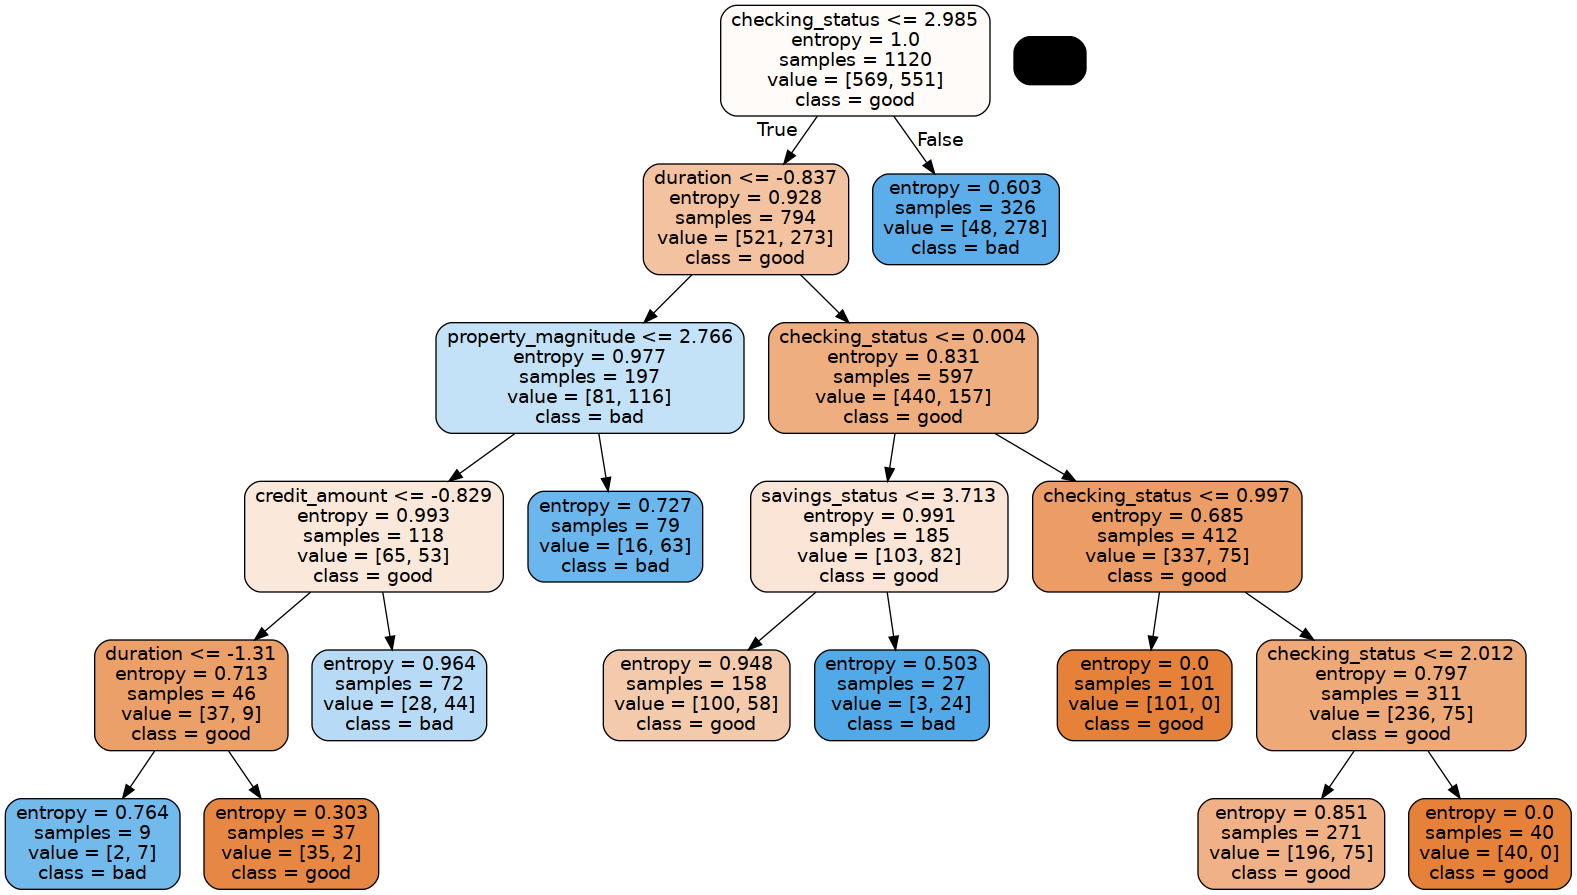

In [43]:
dot_data = StringIO()
export_graphviz(
                decision_tree = model, 
                out_file=dot_data,
                filled=True, 
                rounded=True,  
                class_names = ['good','bad'],
                feature_names = creditg_df.columns[:-1]) 

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

Image(graph[0].create_png()) 

El modelo comienza en el nodo raíz (0) (que representa todo el conjunto de datos) que es "checking_status <= 2.985", lo que significa que el primer punto de decisión se basa en la característica "checking_status". Si el valor de esta característica es menor o igual que 2.985, el árbol seguirá la arista etiquetada como "True" hasta el nodo hijo izquierdo (1); de lo contrario, seguirá la arista etiquetada como "False" hasta el nodo hijo derecho (2).

El árbol sigue dividiéndose en función de otras características, como "duration" y "property_magnitude", y las divisiones vienen determinadas por el valor umbral de la característica. Por ejemplo, en el nodo 3, la división se basa en "property_magnitude <= 2.766", si el valor de esta característica es menor o igual a 2.766, el árbol seguirá la arista hacia el nodo hijo izquierdo 11, de lo contrario seguirá la arista hacia el nodo hijo derecho 12.

Cada nodo también contiene información sobre las muestras, la entropía y la distribución de clases que llegan a ese punto de decisión concreto. Por ejemplo, el nodo etiquetado como "0" tiene una entropía de 1, lo que significa que las muestras que llegan a este nodo son completamente inciertas. Además, las muestras se reparten uniformemente entre dos clases, "good" y "bad", con valores [569, 551] respectivamente.

La decisión final del árbol se toma en los nodos hoja, que contienen la etiqueta de clase de las muestras que llegan a ellos. El modelo puede interpretarse como un conjunto de reglas para clasificar nuevos datos.

Cabe destacar que el árbol parece tener una buena accuracy, ya que la mayoría de los nodos hoja clasifican las muestras como de clase "good". El árbol es capaz de clasificar correctamente un gran número de muestras como "good" basándose en los valores de las características de entrada. Esto puede verse por el número de muestras en el atributo de valor de los nodos hoja que son en su mayoría de clase "good". Además, la entropía de la mayoría de los nodos hoja es baja, lo que indica que las muestras de esos nodos son en su mayoría de la misma clase, lo que apunta de nuevo a una buena accuracy del árbol.
Además, la profundidad del árbol es relativamente baja, lo que indica que el árbol no está overfitted. Parece ser que el árbol no es ni demasiado complejo ni demasiado simple.


## titanic.arff dataset

Este dataset responde a un problema de clasificación, el mismo permitirá determinar qué factores influyen para que un pasajero sobreviviera o no en este trágico accidente.

In [2]:
# cargamos el .arff file
titanic = arff.loadarff('titanic.arff')
# creditg es una tupla que contiene dos elementos: un array numpy y una lista de tuplas
# primer elemento de la tupla (el array numpy) es el que nos interesa (titanic[0])

In [3]:
# convertimos los datos a df
titanic_df = pd.DataFrame(titanic[0])

In [5]:
# 5 primeras filas del df
titanic_df.head()

,class,age,sex,survived
0,b'1st',b'adult',b'male',b'yes'
1,b'1st',b'adult',b'male',b'yes'
2,b'1st',b'adult',b'male',b'yes'
3,b'1st',b'adult',b'male',b'yes'
4,b'1st',b'adult',b'male',b'yes'


Utilizamos el método str.decode() para decodificar los objetos tipo bytes de las columnas 'survived', 'class', 'age' y 'sex' y eliminar el carácter 'b' inicial. 

In [4]:
for col in titanic_df: 
    titanic_df[col] = titanic_df[col].str.decode("utf-8")

In [5]:
# 5 primeras filas del df correcto
titanic_df.head()

,class,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes


In [6]:
# nombres de las clases
titanic_df['survived'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
# info de las columnas del df
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     2201 non-null   object
 1   age       2201 non-null   object
 2   sex       2201 non-null   object
 3   survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


- Observamos que el df titanic_df tiene 2201 filas y 4 columnas. 
- Los tipos de datos de las columnas son object. 
- Los nombres de las columnas son "class", "age", "sex" y "survived".
- Todas las columnas tienen 2201 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.

In [8]:
# Looking at how many null values we have:
titanic_df.isnull().sum()

class       0
age         0
sex         0
survived    0
dtype: int64

- Observamos que el dataset no contiene valores nulos. 

### Conversión var categóricas a numéricas (LabelEncoding)

Debido a que DecisionTree de sklearn solo acepta variables numéricas, debemos pasar las variables categóricas de nuestro dataset a variables numéricas.

Para ello usaremos Label Encoding:
- Convierte una columna categórica a una numérica, dándole un valor único a cada posible valor de texto. 
- Para un árbol de decisión, aunque no sean variables categóricas ordinales (jerarquía) está bien codificar categorías utilizando valores ordinales (0, 1, 2, 3, etc.). En cambio, para un algoritmo que aprende un peso para cada variable no estaría bien.

In [5]:
# creamos una instancia de LabelEncoder
le = LabelEncoder()

# seleccionamos las columnas categóricas
cat_cols_titanic = titanic_df[['class','age', 'sex', 'survived']].columns

# aplicamos LabelEncoder a cada columna:
    # La función lambda toma una columna (col) como entrada y le aplica el método fit_transform() de la clase LabelEncoder. 
    # Aplicamos el método fit_transform() de la clase LabelEncoder a cada una de 
    # las columnas categóricas del df, sustituyendo los valores categóricos originales por valores numéricos.
titanic_df[cat_cols_titanic] = titanic_df[cat_cols_titanic].apply(lambda col: le.fit_transform(col))

In [10]:
# df con todos los datos numéricos
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   class     2201 non-null   int64
 1   age       2201 non-null   int64
 2   sex       2201 non-null   int64
 3   survived  2201 non-null   int64
dtypes: int64(4)
memory usage: 68.9 KB


Ahora podemos utilizar este df con variables numéricas para ajustar y entrenar el modelo de árbol de decisión.

### Separar las variables independientes de la variable dependiente
- Separar en atributos (X) y etiquetas (y).
- Las columnas del conjunto de datos se pueden separar en feature columns (X) y target column (y).

In [6]:
# variables independientes (feature columns): las variables que se utilizan para predecir la variable objetivo (y)
X_t = titanic_df.iloc[:, :-1].values
# variable dependiente (target column): en nuestro caso 'survived'
y_t= titanic_df.iloc[:, -1].values

### Comprobación del desequilibrio de clases

In [8]:
# Checking data imbalance 
print(titanic_df['survived'].value_counts()) # recuento de instancias de cada clase en el df

0    1490
1     711
Name: survived, dtype: int64


- 0: no survived
- 1: survived

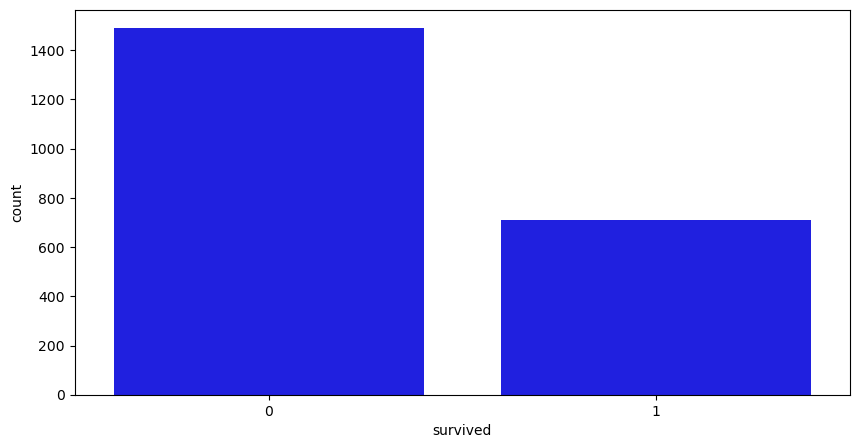

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x = titanic_df['survived'], color = 'blue')
plt.show()

- Podemos observar que hay un desequilibrio de clases.
- Vemos que la clase survived solo tiene 711 instancias, mientras que la clase no survived tiene 1490 instancias. 
- Este desequilibrio en el número de instancias de cada clase puede plantear problemas a la hora de entrenar y evaluar modelos de Machine Learning. Por ejemplo, un modelo que siempre predice la clase mayoritaria es probable que logre una alta accuracy, pero no será útil en la práctica, ya que no está generalizando bien.

### Oversampling con SMOTE 

- Al tratarse de datos desequilibrados, nuestro modelo podría intentar ajustarse a la clase mayoritaria y proporcionar una predicción sesgada, además de ofrecer una accuracy engañosa.
- Por este motivo, realizaremos un procedimiento de sobremuestreo en las clases minoritarias con SMOTE.

In [9]:
SMOTE = SMOTE()
X_o_t, y_o_t = SMOTE.fit_resample(X_t, y_t)

In [10]:
# miramos el resultado de sobremuestro
y1_t = pd.DataFrame(y_o_t)
y1_t.value_counts()

0    1490
1    1490
dtype: int64

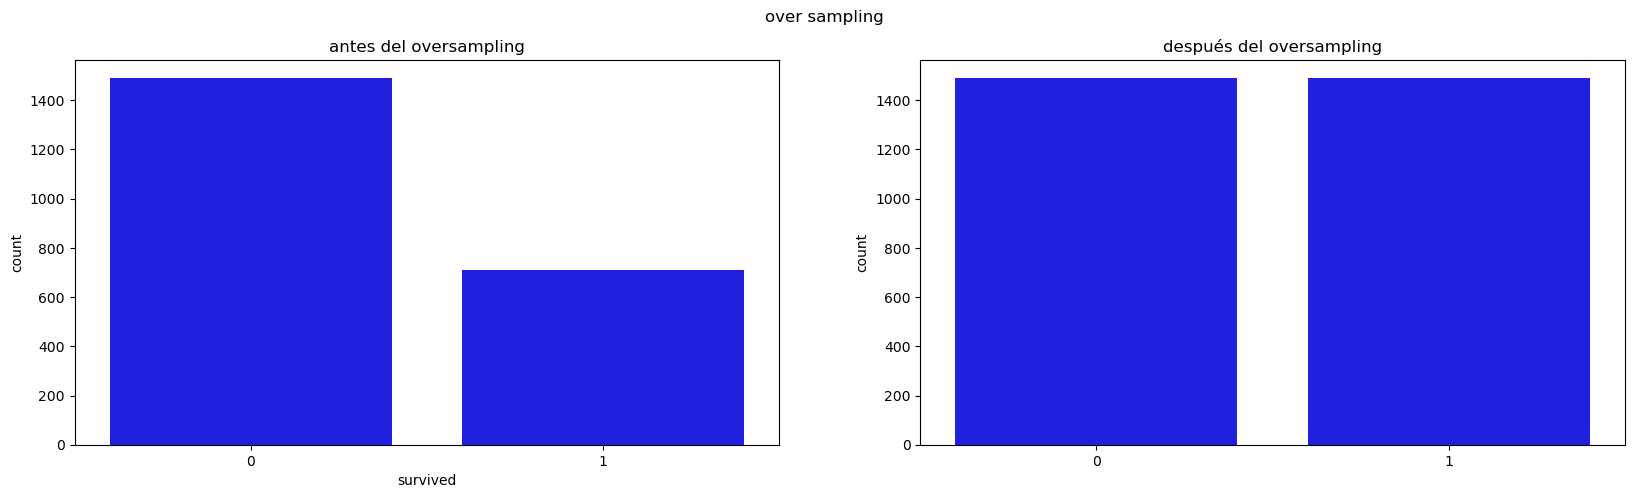

In [34]:
figure, axes = plt.subplots(1, 2, sharex=True,figsize=(20, 5))
figure.suptitle('over sampling')
axes[0].set_title('antes del oversampling')
axes[1].set_title('después del oversampling')
sns.countplot(x = titanic_df['survived'], color = 'blue',ax=axes[0])
sns.countplot(x = y_o_t, color = 'blue',ax=axes[1])
plt.show()

- Hemos incrementado de forma “sintética” los ejemplos de la clase minoritaria.
- Podemos observar que ya no hay un desequilibrio de clases, las clases están balanceadas.

### Dividir en train y test set

El método de Train-Test-Split se utiliza para dividir el conjunto de datos en dos partes: el conjunto de entrenamiento (training set) y el conjunto de prueba (test set). 

El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de pruebas se utiliza para evaluar el rendimiento del modelo. Esto es importante por varias razones:

- Overfitting: sin un método de evaluación adecuado, es fácil caer en la trampa del overfitting, en la que el modelo memoriza los datos de entrenamiento, pero obtiene malos resultados con datos nuevos que nunca ha visto. Si se evalúa el rendimiento del modelo en un test set separado, se puede detectar y evitar el overfitting.

- Selección de modelos (model selection): Train-Test-Split permite comparar diferentes modelos y seleccionar el que obtiene mejores resultados en el test set, lo que permite hacerse una mejor idea del rendimiento del modelo con datos nuevos y desconocidos.

- Evaluación no sesgada (unbiased evaluation): al utilizar un test set separado para la evaluación, podemos asegurarnos de que la evaluación no es sesgada (unbiased) y no se ve afectada por el proceso de entrenamiento.

- Generalización: al evaluar el rendimiento del modelo con datos desconocidos, podemos hacernos una idea de cómo funcionará el modelo con datos nuevos y desconocidos, lo que es esencial para determinar su capacidad de generalización.

En resumen, utilizar el método de Train-Test-Split antes de aplicar una técnica de aprendizaje es una buena práctica que ayuda a garantizar que el modelo sea robusto, generalizable y no sesgado, así como a evaluar su rendimiento de forma no sesgada.


In [11]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_o_t, y_o_t, test_size=0.2, random_state=42)

- El test set será el 20% del conjunto total de datos (test_size=0.2). Podemos usar 80%-20% ya que tenemos relativamente pocas instancias (2201). Con muchas intancias se recomienda 70%-30%. 
- El random_state se establece en 42, lo que significa que se producirá la misma división cada vez que se ejecute el código.

### Hyperparameter tuning

Para este caso, hemos utilizado los siguientes hiperparámetros:

- **min_samples_split**: controla el número mínimo de muestras necesarias para dividir un nodo interno en el árbol de decisión. Se utiliza para evitar el overfitting asegurando que el árbol no continúe dividiéndose hasta que cada nodo hoja contenga sólo una muestra.

- **min_samples_leaf**: controla el número mínimo de muestras necesarias para estar en un nodo hoja. Se utiliza para evitar el overfitting asegurando que el árbol no continúe dividiéndose hasta que cada nodo hoja contenga sólo un pequeño número de muestras.

- **max_leaf_nodes**: controla el número máximo de nodos hoja que puede generar el árbol de decisión. Se utiliza para evitar el overfitting asegurando que el árbol no sigue creciendo hasta que se vuelve demasiado complejo y capture ruido en los datos. El GridSearchCV probará diferentes valores en el array para encontrar el tamaño óptimo del árbol.

In [12]:
model_params_t={
    # mín instancias que se necesita para hacer una división
    'min_samples_split': [2, 4, 6],
    # número mínimo de muestras necesarias para estar en un nodo hoja
    'min_samples_leaf': [1, 2, 3],
    # nº max de hojas que tendrá el árbol
    'max_leaf_nodes':[10, 20, 30, 50]
}

In [144]:
# info sobre los parámetros del DecisionTreeClassifier
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

### cv = 3

#### Grid Search modelo de árbol de decisión

- Utilizamos GridSearchCV para encontrar la mejor combinación de hiperparámetros para el DecisionTreeClassifier.

In [13]:
# instanciamos la clase DecisionTreeClassifier
model_t = DecisionTreeClassifier(random_state=42) # random_state=42 para que en cada ejecución nos salga el mismo resultado

# GridSearchCV nos permite encontrar la mejor combinación de hiperparámetros
gscv_t = GridSearchCV(model_t, model_params_t, cv=3) # cv es el cross-validation con 3 folds para entrenar el algoritmo y validarlo

# fit del GridSearchCV
model_gs_t = gscv_t.fit(X_train_t, y_train_t)

# obtenemos los mejores parámetros y la accuracy con esos parámetros
print("Best: %f using %s" % (model_gs_t.best_score_,model_gs_t.best_params_)) 

Best: 0.710146 using {'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


- Los mejores parámetros encontrados son max_leaf_nodes=10, min_samples_leaf = 1 y min_samples_split=2, con los que se consigue una accuracy del 71% en el conjunto de entrenamiento. 

#### Generar el árbol de decisión óptimo

A continuación, el modelo se vuelve a entrenar con estos parámetros y se evalúa en el test set.

In [14]:
# cogemos los parámetros anteriores (los mejores)
model_t = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=2, min_samples_leaf=1, criterion='entropy') # escogemos como criterio la entropía
model_t.fit(X_train_t, y_train_t)
# predicción de los valores 
y_pred_t = model_t.predict(X_test_t)

[Text(0.5, 1.0, 'Decision Tree with Hyperparameters (cv=3)')]

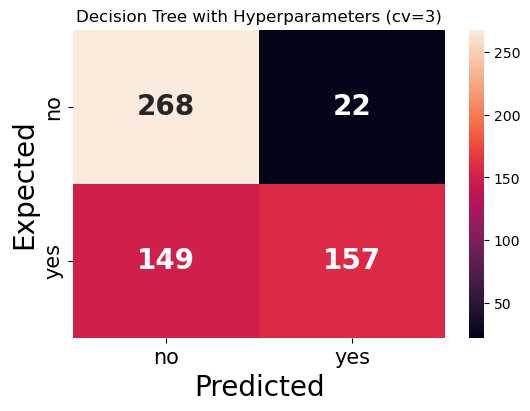

In [36]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(confusion_matrix(y_test_t, y_pred_t), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['yes', 'no']
ax.set_xticklabels(labels[::-1], fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Expected', fontsize=20);
ax.set_xlabel('Predicted', fontsize=20)
ax.set(title='Decision Tree with Hyperparameters (cv=3)')

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test_t, y_pred_t).ravel()
(tn, fp, fn, tp)

(268, 22, 149, 157)

In [16]:
# Precision, recall, f-score from the multi-class support function
print('#'*60)
print('Decision Tree with Hyperparameters')
print(classification_report(y_test_t, y_pred_t))
print('Accuracy score: ', round(accuracy_score(y_test_t, y_pred_t), 3))
print('F1 Score: ', round(f1_score(y_test_t, y_pred_t), 3))

############################################################
Decision Tree with Hyperparameters
              precision    recall  f1-score   support

           0       0.64      0.92      0.76       290
           1       0.88      0.51      0.65       306

    accuracy                           0.71       596
   macro avg       0.76      0.72      0.70       596
weighted avg       0.76      0.71      0.70       596

Accuracy score:  0.713
F1 Score:  0.647


#### Visualización

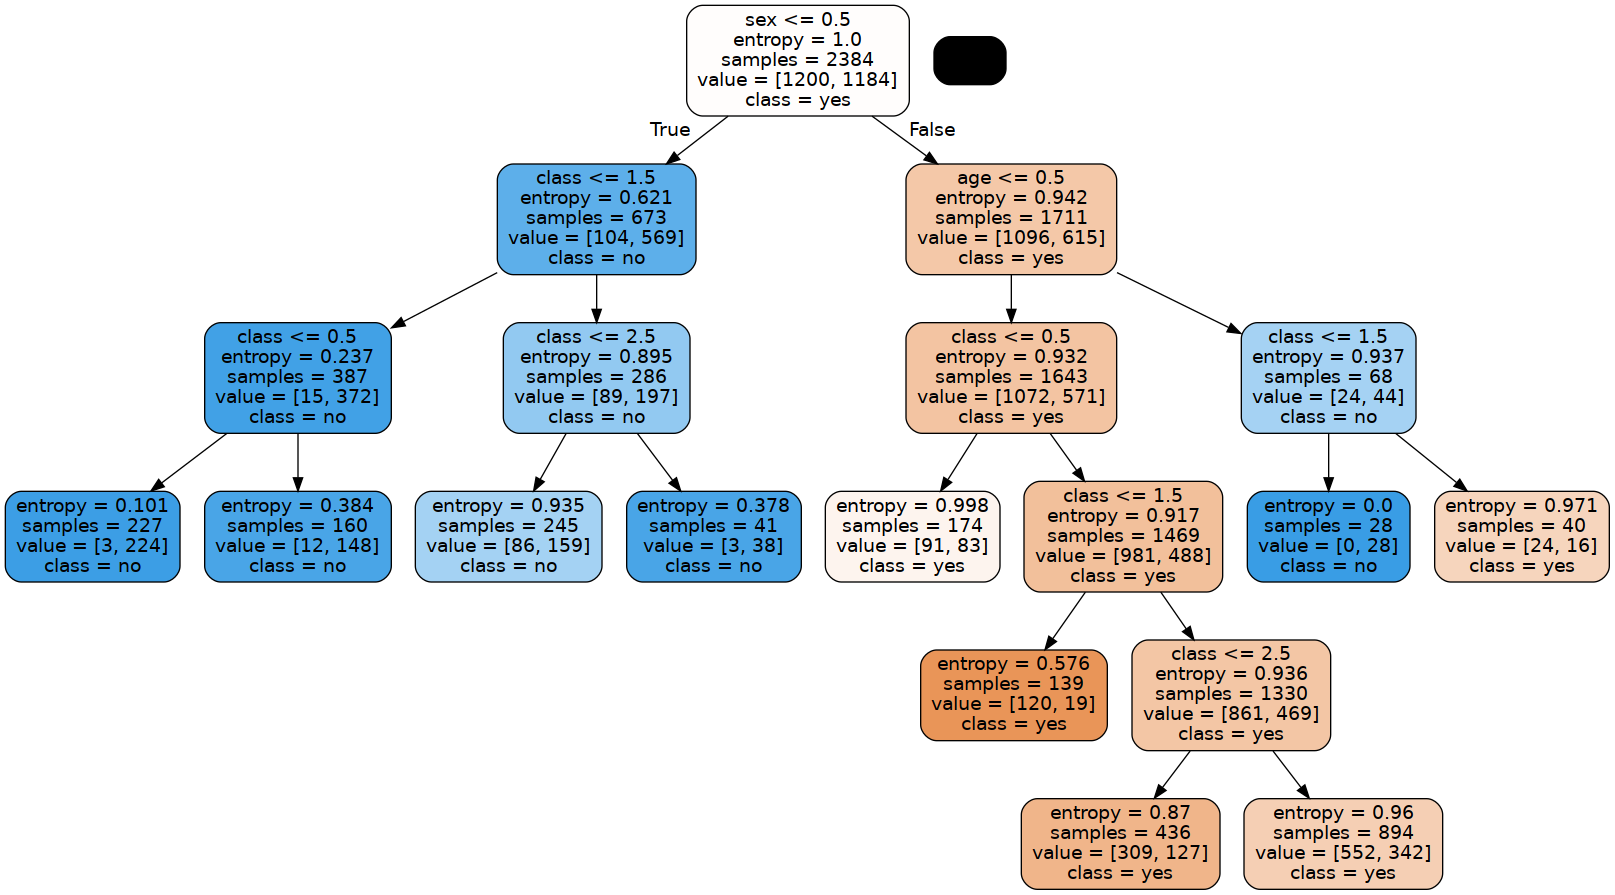

In [19]:
dot_data_t = StringIO()
export_graphviz(
                decision_tree = model_t, 
                out_file=dot_data_t,
                filled=True, 
                rounded=True,  
                class_names = ['yes','no'],
                feature_names = titanic_df.columns[:-1]) 
graph = pydot.graph_from_dot_data(dot_data_t.getvalue()) 

Image(graph[0].create_png()) 

### cv = 10

#### Grid Search modelo de árbol de decisión

- Utilizamos GridSearchCV para encontrar la mejor combinación de hiperparámetros para el DecisionTreeClassifier.

In [20]:
# instanciamos la clase DecisionTreeClassifier
model_t2 = DecisionTreeClassifier(random_state=42) # random_state=42 para que en cada ejecución nos salga el mismo resultado

# GridSearchCV nos permite encontrar la mejor combinación de hiperparámetros
gscv_t2 = GridSearchCV(model_t2, model_params_t, cv=10) # cv es el cross-validation con 10 folds para entrenar el algoritmo y validarlo

# fit del GridSearchCV
model_gs_t2 = gscv_t2.fit(X_train_t, y_train_t)

# obtenemos los mejores parámetros y la accuracy con esos parámetros
print("Best: %f using %s" % (model_gs_t2.best_score_,model_gs_t2.best_params_)) 

Best: 0.710128 using {'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


- Los mejores parámetros encontrados son max_leaf_nodes=10, min_samples_leaf = 1 y min_samples_split=2, con los que se consigue una accuracy del 71% en el conjunto de entrenamiento. 

#### Generar el árbol de decisión óptimo

A continuación, el modelo se vuelve a entrenar con estos parámetros y se evalúa en el test set.

In [21]:
# cogemos los parámetros anteriores (los mejores)
model_t2 = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=2, min_samples_leaf=1, criterion='entropy') # escogemos como criterio la entropía
model_t2.fit(X_train_t,y_train_t)
# predicción de los valores 
y_pred_t2 = model_t2.predict(X_test_t)

[Text(0.5, 1.0, 'Decision Tree with Hyperparameters (cv=10)')]

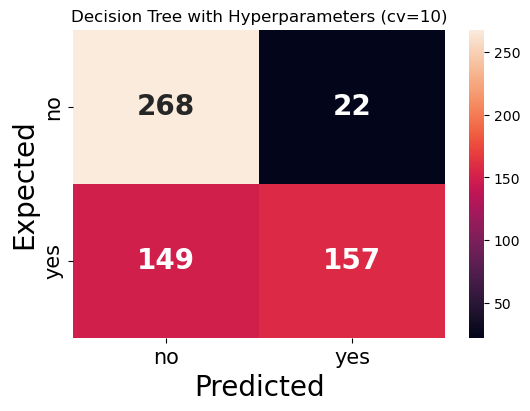

In [45]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(confusion_matrix(y_test_t, y_pred_t2), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['yes', 'no']
ax.set_xticklabels(labels[::-1], fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Expected', fontsize=20);
ax.set_xlabel('Predicted', fontsize=20)
ax.set(title='Decision Tree with Hyperparameters (cv=10)')

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test_t, y_pred_t2).ravel()
(tn, fp, fn, tp)

(268, 22, 149, 157)

In [23]:
# Precision, recall, f-score from the multi-class support function
print('#'*60)
print('Decision Tree with Hyperparameters (cv=10)')
print(classification_report(y_test_t, y_pred_t2))
print('Accuracy score: ', round(accuracy_score(y_test_t, y_pred_t2), 3))
print('F1 Score: ', round(f1_score(y_test_t, y_pred_t2), 3))

############################################################
Decision Tree with Hyperparameters (cv=10)
              precision    recall  f1-score   support

           0       0.64      0.92      0.76       290
           1       0.88      0.51      0.65       306

    accuracy                           0.71       596
   macro avg       0.76      0.72      0.70       596
weighted avg       0.76      0.71      0.70       596

Accuracy score:  0.713
F1 Score:  0.647


#### Visualización

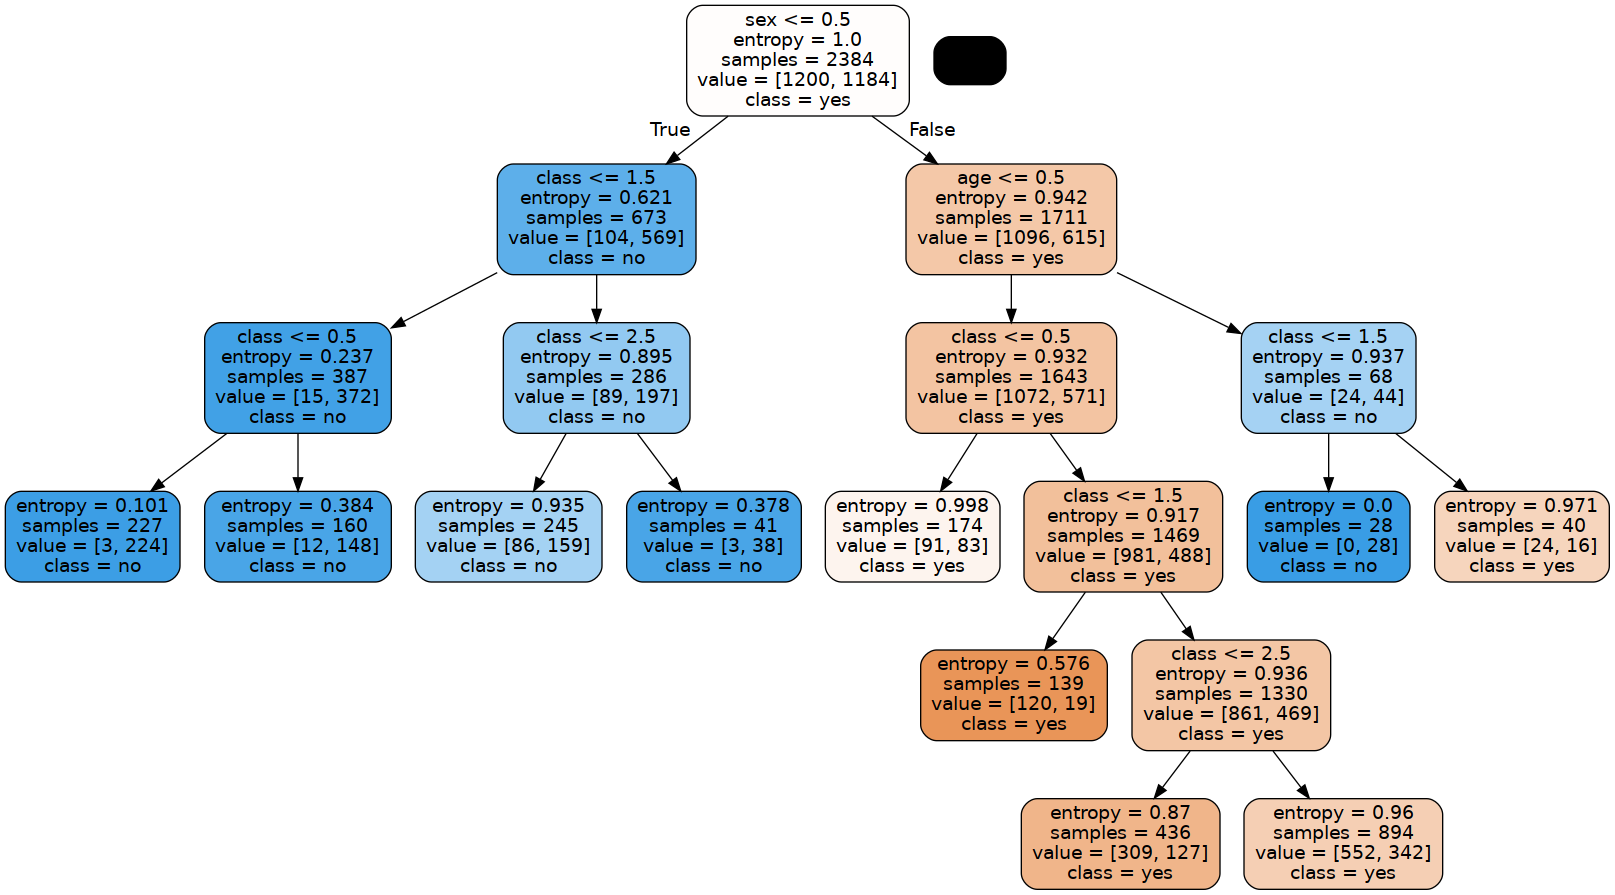

In [24]:
dot_data_t2 = StringIO()
export_graphviz(
                decision_tree = model_t2, 
                out_file=dot_data_t2,
                filled=True, 
                rounded=True,  
                class_names = ['yes','no'],
                feature_names = titanic_df.columns[:-1]) 
graph2 = pydot.graph_from_dot_data(dot_data_t2.getvalue()) 

Image(graph2[0].create_png()) 

### Discusión para cv = 3 y cv = 10

- Obtenemos el mismo resultado para cv = 3 que para cv = 10. Esto sugiere que el modelo no es sensible al valor específico del número de pliegues en el proceso de validación cruzada. El resultado es coherente independientemente del valor del parámetro cv. Esto puede atribuirse al tamaño del conjunto de datos y a la estabilidad del modelo. Además, aumentar el número de pliegues en el proceso de validación cruzada puede incrementar el tiempo de cálculo y el coste computacional, lo que puede no ser necesario si el modelo ya es estable con un número menor de pliegues.

En ambos casos (cv=3 y cv=10):

- De las matrices de confusión se observa que:

    - 268 muestras que eran realmente "no" fueron clasificadas correctamente como "no" por el modelo (TN).
    - 157 muestras que en realidad eran "yes" fueron clasificadas correctamente como "yes" por el modelo (TP).
    - 22 muestras que en realidad eran "no" fueron clasificadas como "yes" por el modelo. Se trata de falsos positivos (error de tipo I).
    - 149 muestras que en realidad eran "yes" fueron clasificadas como "no" por el modelo. Se trata de falsos negativos (error de tipo II).
    
- El modelo entrenado con los mejores hiperparámetros y evaluado en el test set da como resultado una accuracy de 0.713, lo que significa que el modelo ha clasificado correctamente el 71.3% de las muestras del test set. Esto indica que el modelo funciona moderadamente bien en el test set (datos no vistos). 

- No obstante, el modelo no funciona bien en términos de recall porque la puntuación de recall de la clase 0 es 0.92 (relativamente alta), pero la de la clase 1 es sólo 0.51 (relativamente baja). Esto significa que el modelo no identifica correctamente un número significativo de casos de la clase 1, lo que se traduce en una puntuación de recall global más baja. Esto podría ser un problema si el objetivo del modelo es identificar correctamente todos los casos de la clase 1, ya que daría lugar a muchos falsos negativos.


Por lo que respecta al árbol, este comienza en el nodo raíz, denominado "sex <= 0.5", que se divide en dos ramas: una denominada "True" y otra "False". La rama "True" conduce al nodo "class <= 1,5" y la rama "False" conduce al nodo "age <= 0.5". Cada nodo contiene información sobre la característica que se está dividiendo, la entropía en ese nodo, el número de muestras y la distribución de clases de las muestras. Los nodos de las hojas del árbol contienen información sobre la predicción de clase para las muestras que llegan a ese nodo de la hoja. Cuanto menor es la entropía en un nodo, más puro es el conjunto de muestras. El árbol muestra que la característica de sex se elige como característica raíz y, a continuación, se utiliza la característica de class para dividir aún más los datos. El árbol se construye buscando de forma iterativa la característica que da lugar a los subconjuntos más puros. Cada nodo interno del árbol corresponde a una característica y cada nodo hoja corresponde a una etiqueta de clase. El árbol puede utilizarse para clasificar nuevas muestras recorriéndolo desde la raíz hasta un nodo de hoja y devolviendo la etiqueta de clase asociada a ese nodo de hoja.
